# Review Frames

1. Compute TD and FD coprecessing frames for a given test case
2. Compare higher multipole momemnts for each frame
3. Diagnose effect of not modeling select multipoles in one of these choices by making realted amplitudes pathologically small
4. Are the correct inertial moments correctly recovered?


In [4]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup the notebook's environment
import lalsimulation as lalsim
import lal
import numpy as np
from numpy import *
from matplotlib.pyplot import *
from positive import *
from nrutils import lalphenom
from positive.units import *
from nrutils import scsearch,gwylm
from xcp import *
import warnings

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"


In [5]:
# Find a catalog entry of interest using a keyword search
# a = scsearch(keyword='q1a02t120',verbose=True)[0]
# a = scsearch(keyword='q1a02t60_T_96_384',verbose=True)[0]
# a = scsearch(keyword='hrq',institute='gt',q=2,verbose=True)[0]
a = scsearch(keyword='q8a06t120',verbose=True)[0]
# a = scsearch(keyword='q8a08t150dP2_T_120_480',verbose=True)[0]

(scsearch)>> Found keyword (=q8a06t120) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 2 possibly degenerate simulations:
(scsearch)>> [0001][pnr-catalog] q8: 1chi0.60-p-q8.00	(q8a06t120dP2_T_96_384)
(scsearch)>> [0002][hogshead] q8precessing: 1chi0.60-p-q8.00	(q8a06t120dP2_T_96_384)



In [6]:
# Load the realted NR waveform
y = {}
lmax = 2
y['raw'] = gwylm(a,lmax=lmax,dt=0.5,clean=True,verbose=False,pad=2000,load_dynamics=False)

(romline!)>> N is 2, but it must be less than or equal to 3. We have set N=3. This course is often desired in cases where N=2 is naively given.
(__calc_radiated_linear_momentum__!)>> The current objects max ell value is 2, but we recommend a value of at least 4 for accurate determination of radiated linear momentum.


In [7]:
# Generate waveform in J-of-t-frame (this rotates all multipoles and vector metadata)
y['j'] = y['raw'].__calc_j_of_t_frame__()

(__calc_radiated_linear_momentum__!)>> The current objects max ell value is 2, but we recommend a value of at least 4 for accurate determination of radiated linear momentum.
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__calc_radiated_linear_momentum__!)>> The current objects max ell value is 2, but we recommend a value of at least 4 for accurate determination of radiated linear momentum.


In [8]:
# TD
y['cp-td'] = y['j'].__calc_coprecessing_frame__(transform_domain='td',kind='psi4')
# FD
y['cp-fd'] = y['j'].__calc_coprecessing_frame__(transform_domain='fd',kind='psi4')

(__calc_radiated_linear_momentum__!)>> The current objects max ell value is 2, but we recommend a value of at least 4 for accurate determination of radiated linear momentum.
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.
(__calc_radiated_linear_momentum__!)>> The current objects max ell value is 2, but we recommend a value of at least 4 for accurate determination of radiated linear momentum.
(calc_coprecessing_angles)>> The domain values seem evenly split between positive and negative values. Thus, we will interpret the input as corresponding to FREQUENCY DOMAIN data.
(__rotate_frame_at_all_times__!)>> Note that metadata vectors for initial da

In [9]:
# TD
y['cp-td-sym'] = y['cp-td'].__symmetrize__(zparity=True)
# FD
y['cp-fd-sym'] = y['cp-fd'].__symmetrize__(zparity=True)

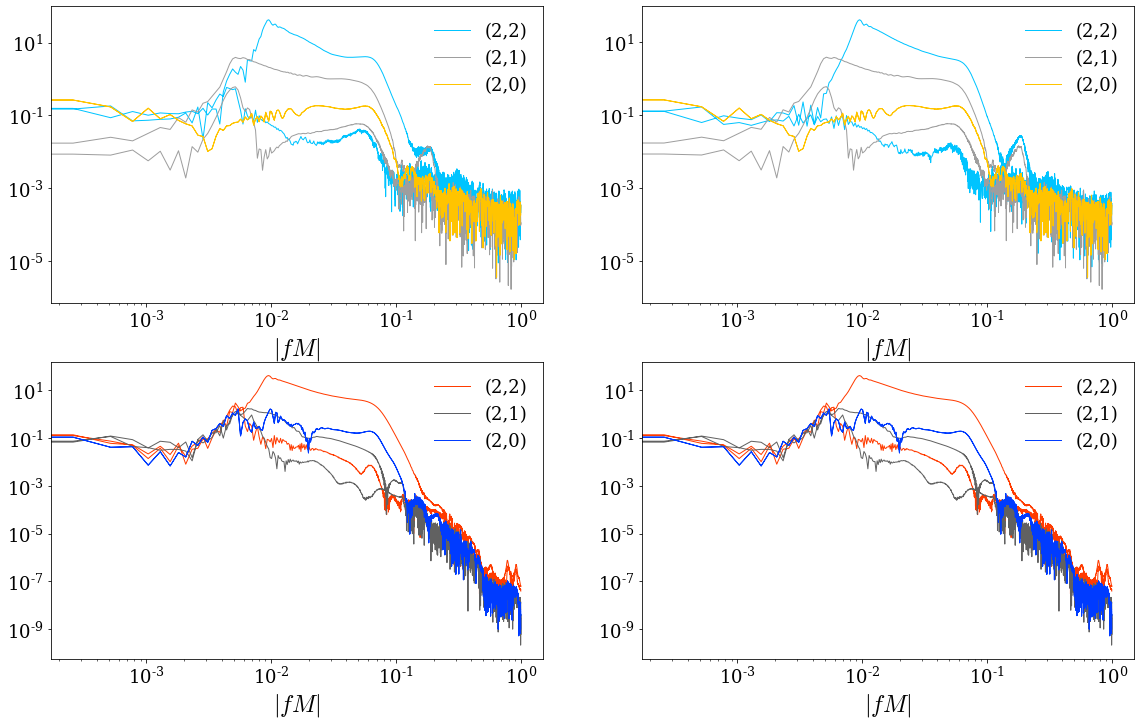

In [10]:


fig,ax = subplots(2,2,figsize=3*figaspect(0.618))
ax = ax.flatten()
lw=1

#
plotted_lms = [ (2,2), (2,1), (2,0) ]
# plotted_lms = [ (2,-2), (2,-1), (2,0) ]
# plotted_lms = [ (3,3), (3,2), (3,0) ]
color = rgb(len(plotted_lms))


#
plot_symmetrized = False
sym_tag = '-sym' if plot_symmetrized else ''

#
k = 0
for l,m in plotted_lms:
    
    sca(ax[0])
    key = 'cp-td%s'%sym_tag
    plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=color[k],label='(%i,%i)'%(l,m),lw=lw )
    xscale('log');yscale('log');legend();xlabel('$|fM|$')
    
    sca(ax[1])#
    plot_symmetrized = True
    sym_tag = '-sym' if plot_symmetrized else ''
    key = 'cp-td%s'%sym_tag
    plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=color[k],label='(%i,%i)'%(l,m),lw=lw )
    xscale('log');yscale('log');legend();xlabel('$|fM|$')
    
    sca(ax[2])#
    plot_symmetrized = True
    sym_tag = '-sym' if plot_symmetrized else ''
    key = 'cp-fd%s'%sym_tag
    plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=1-color[k],label='(%i,%i)'%(l,m),lw=lw )
    xscale('log');yscale('log');legend();xlabel('$|fM|$')
    
    sca(ax[3])#
    plot_symmetrized = True
    sym_tag = '-sym' if plot_symmetrized else ''
    key = 'cp-fd%s'%sym_tag
    plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=1-color[k],label='(%i,%i)'%(l,m),lw=lw )
    xscale('log');yscale('log');legend();xlabel('$|fM|$')
    
    k += 1
    

#


# # --- 
# sca(ax[1])
# # --- 


# #
# plot_symmetrized = True
# sym_tag = '-sym' if plot_symmetrized else ''

# #
# k = 0
# for l,m in plotted_lms:
#     key = 'cp-td%s'%sym_tag
#     plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=color[k],label='(%i,%i)'%(l,m),lw=lw )
#     k += 1
    

# #
# xscale('log')
# yscale('log')
# legend()
# xlabel('$fM$')

Text(0.5, 0, '$fM$')

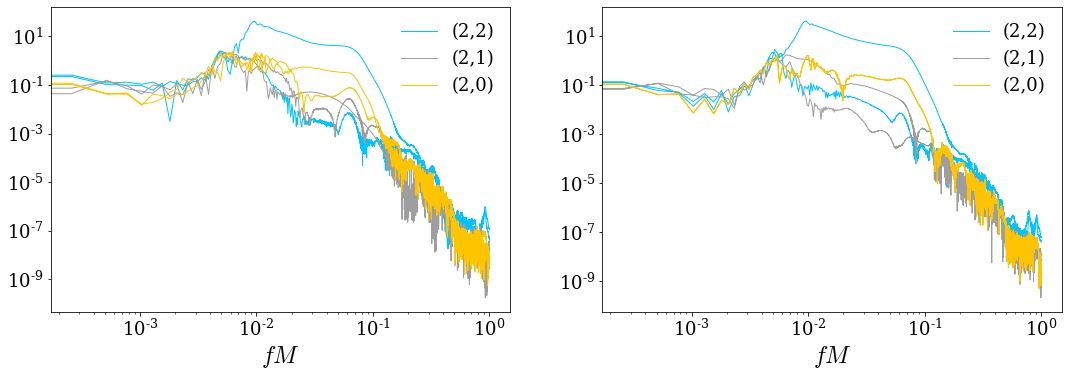

In [11]:


fig,ax = subplots(1,2,figsize=1.4*figaspect(0.618/2))


# --- 
sca(ax[0])
# --- 


#
plot_symmetrized = False
sym_tag = '-sym' if plot_symmetrized else ''

#
k = 0
for l,m in plotted_lms:
    key = 'cp-fd%s'%sym_tag
    plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=color[k],label='(%i,%i)'%(l,m),lw=lw )
    k += 1
    

#
xscale('log')
yscale('log')
legend()
xlabel('$fM$')


# --- 
sca(ax[1])
# --- 


#
plot_symmetrized = True
sym_tag = '-sym' if plot_symmetrized else ''

#
k = 0
for l,m in plotted_lms:
    key = 'cp-fd%s'%sym_tag
    plot( abs(y[key].f), y[key][l,m]['strain'].fd_amp,color=color[k],label='(%i,%i)'%(l,m),lw=lw )
    k += 1
    

#
xscale('log')
yscale('log')
legend()
xlabel('$fM$')